In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
df = pd.read_csv("Kenya_Schools.csv")
df.head()

,Name of School,Level of Education,Status of School,Sponsor of School,School Institution Type_1,School Institution Type_2,School Institution Type_3,Pupil Teacher Ratio,Pupil Classroom Ratio,Pupil Toilet Ratio,...,Non-Teaching Staff Female,Province,District,Division,Location,Costituency,Geolocation,Latitude,Longitude,County
0,VOO SPECIAL UNIT,PRIMARY SCHOOL,PUBLIC,CENTRAL GOVERNMENT/DEB,MIXED,DAY & BOARDING,SPECIAL SCHOOL,19.0,19.0,6.3,...,0,EASTERN,KITUI,MUTHA,VOO,MUTITO,"(-1.66668, 38.32132)",-1.666680,38.321320,KITUI
1,MASAANTARE PRI,PRIMARY SCHOOL,PUBLIC,RELIGIOUS ORGANIZATION,MIXED,DAY ONLY,ORDINARY,44.3,53.2,88.7,...,1,RIFT VALLEY,NAROK,OLOLUNGA,NAROK SOUTH,OLOLUNGA,"(-1.012145, 35.648155)",-1.012145,35.648155,NAROK
2,NGOCHONI PRY SCH,PRIMARY SCHOOL,PUBLIC,CENTRAL GOVERNMET/DEB,MIXED,DAY ONLY,ORDINARY,37.6,32.9,131.5,...,0,NYANZA,KURIA,MABERA,BUGUMBE WEST,KURIA,"(-1.159798, 34.394076)",-1.159798,34.394076,MIGORI
3,NEEMA JUNIOR ACADEMY,PRIMARY SCHOOL,PRIVATE,PRIVATE INDIVIDUAL,MIXED,DAY ONLY,ORDINARY,18.9,22.0,44.0,...,1,CENTRAL,THIKA,KAMWANGI,MANGU,GATUNDU NORTH,"(-0.99747, 36.93082)",-0.997470,36.930820,KIAMBU
4,LWANDA PRI SCH,PRIMARY SCHOOL,PUBLIC,CENTRAL GOVERNMENT/DEB,MIXED,DAY ONLY,ORDINARY,42.0,52.5,0.0,...,0,NYANZA,RACHUONYO,KABONDO,KAWOUR,KASIPUL KABONDO,"(-0.42783, 34.92995)",-0.427830,34.929950,HOMA BAY


In [23]:
''' Extract Nairobi dataset'''
df = df.loc[df['County']=='NAIROBI']
df.head()

,Name of School,Level of Education,Status of School,Sponsor of School,School Institution Type_1,School Institution Type_2,School Institution Type_3,Pupil Teacher Ratio,Pupil Classroom Ratio,Pupil Toilet Ratio,...,Non-Teaching Staff Female,Province,District,Division,Location,Costituency,Geolocation,Latitude,Longitude,County
21,RABAI ROAD PRI SCH,PRIMARY SCHOOL,PUBLIC,CENTRAL GOVERNMENT/DEB,MIXED,DAY ONLY,ORDINARY,35.4,46.4,41.3,...,3,NAIROBI,NAIROBI,MAKADARA,MAKADARA,MAKADARA,"(-1.286176, 36.872801)",-1.286176,36.872801,NAIROBI
24,JOVIAL ACADEMY PRI,PRIMARY SCHOOL,PRIVATE,PRIVATE INDIVIDUAL,MIXED,DAY ONLY,ORDINARY,0.0,0.0,0.0,...,0,NAIROBI,NAIROBI,EMBAKASI,UMOJA,EMBAKASI,"(-1.28058, 36.90975)",-1.280580,36.909750,NAIROBI
32,SALAMA PRI SCH,PRIMARY SCHOOL,PUBLIC,LOCAL GOVERNMENT AUTHORITY,MIXED,DAY ONLY,ORDINARY,48.7,66.9,76.5,...,7,NAIROBI,NAIROBI,STAREHE,HURUMA,STAREHE,"(-1.257462, 36.870696)",-1.257462,36.870696,NAIROBI
40,SHARPENER CHILDRENS CENTRE - PRI,PRIMARY SCHOOL,PRIVATE,PRIVATE INDIVIDUAL,MIXED,DAY ONLY,ORDINARY,11.0,11.0,5.5,...,0,NAIROBI,NAIROBI,KASARANI,RUARAKA,KASARANI,"(-1.248647, 36.874616)",-1.248647,36.874616,NAIROBI
49,HOPE GLAM ACADEMY PRI,PRIMARY SCHOOL,PRIVATE,PRIVATE INDIVIDUAL,MIXED,DAY ONLY,ORDINARY,14.0,14.0,14.0,...,0,NAIROBI,NAIROBI,EMBAKASI,KAYOLE,EMBAKASI,"(-1.269801, 36.911758)",-1.269801,36.911758,NAIROBI


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1280 entries, 21 to 25977
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Name of School              1280 non-null   object 
 1   Level of Education          1280 non-null   object 
 2   Status of School            1280 non-null   object 
 3   Sponsor of School           1277 non-null   object 
 4   School Institution Type_1   1130 non-null   object 
 5   School Institution Type_2   1128 non-null   object 
 6   School Institution Type_3   1280 non-null   object 
 7   Pupil Teacher Ratio         1280 non-null   float64
 8   Pupil Classroom Ratio       1280 non-null   float64
 9   Pupil Toilet Ratio          1280 non-null   float64
 10  Total Number of Classrooms  1280 non-null   int64  
 11  Boys Toilets                1280 non-null   int64  
 12  Girls Toilets               1280 non-null   int64  
 13  Teachers Toilets            128

In [25]:
df = df[['Total Enrolment', 'Total Number of Classrooms', 'Pupil Teacher Ratio']]
df.head()

,Total Enrolment,Total Number of Classrooms,Pupil Teacher Ratio
21,743,16,35.4
24,0,0,0.0
32,1606,24,48.7
40,11,1,11.0
49,28,2,14.0


In [26]:
df = pd.concat([pd.Series(1, index=df.index, name='00'), df], axis=1)
df.head()

,00,Total Enrolment,Total Number of Classrooms,Pupil Teacher Ratio
21,1,743,16,35.4
24,1,0,0,0.0
32,1,1606,24,48.7
40,1,11,1,11.0
49,1,28,2,14.0


In [27]:
df.shape[1]
df.columns = range(df.shape[1])

In [29]:
df.head()

,0,1,2,3
21,1,743,16,35.4
24,1,0,0,0.0
32,1,1606,24,48.7
40,1,11,1,11.0
49,1,28,2,14.0


In [30]:
X = df.drop(columns=2)
y = df.iloc[:, 3]

In [31]:
for i in range(1, len(X.columns)):
    X[i-1] = X[i-1]/np.max(X[i-1])
X.head()

,0,1,3
21,1.0,0.274372,35.4
24,1.0,0.000000,0.0
32,1.0,0.593058,48.7
40,1.0,0.004062,11.0
49,1.0,0.010340,14.0


In [32]:
theta = np.array([0]*len(X.columns))

In [33]:
m = len(df)

In [34]:
def hypothesis(theta, X):
    return theta*X

In [35]:
def computeCost(X, y, theta):
    y1 = hypothesis(theta, X)
    y1=np.sum(y1, axis=1)
    return sum(np.sqrt((y1-y)**2))/(2*47)

In [36]:
def gradientDescent(X, y, theta, alpha, i):
    J = []  #cost function in each iterations
    k = 0
    while k < i:        
        y1 = hypothesis(theta, X)
        y1 = np.sum(y1, axis=1)
        for c in range(0, len(X.columns)):
            theta[c] = theta[c] - alpha*(sum((y1-y)*X.iloc[:,c])/len(X))
        j = computeCost(X, y, theta)
        J.append(j)
        k += 1
    return J, j, theta

In [42]:
J, j, theta = gradientDescent(X, y, theta, 0.001, 10000)

In [43]:
y_hat = hypothesis(theta, X)
y_hat = np.sum(y_hat, axis=1)

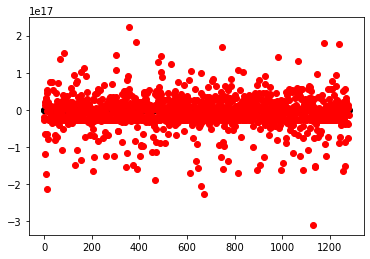

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x=list(range(0, 1280)),y= y, color='black')         
plt.scatter(x=list(range(0, 1280)), y=y_hat, color='red')
plt.show()

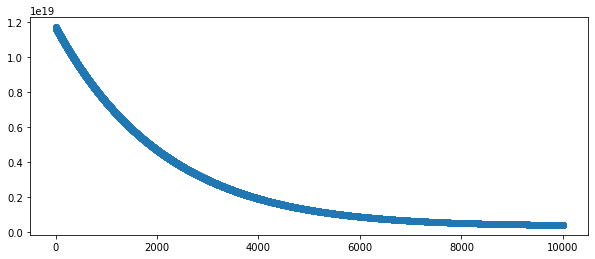

In [50]:
plt.figure(figsize=(10,4))
plt.scatter(x=list(range(0, 10000)), y=J)
plt.show()

In [8]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()


scaledX = scale.fit_transform(X)

print(scaledX)

[[ 1.20329897  0.85961187]
 [-0.67253057 -1.07882141]
 [ 3.38208888  1.82882851]
 ...
 [-0.57406846 -0.59421309]
 [ 1.28913774  1.82882851]
 [ 1.19320029  0.85961187]]


In [12]:
for i in range(1, len(X.columns)):
    X[i-1] = X[i-1]/np.max(X[i-1])
    pass
X.head()

KeyError: 0